In [5]:
from ovito.io import *
from ovito.modifiers import CoordinationAnalysisModifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

# ◆ Pure Systems

## ▻ Radial Distribution Function

Text(0.5, 1.0, 'Pure Solid')

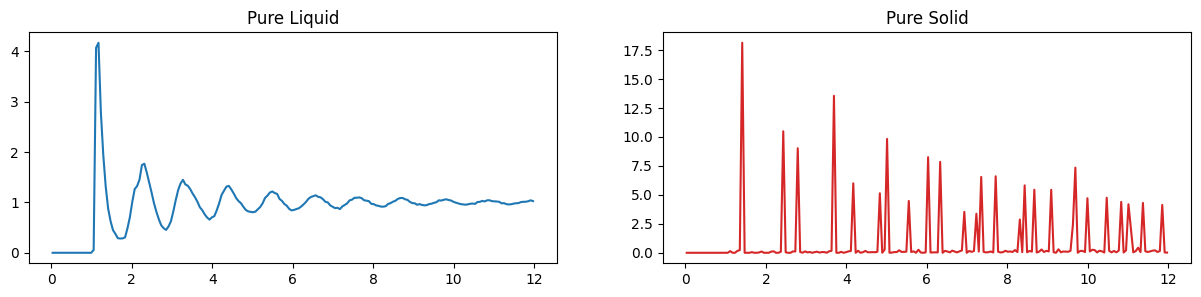

In [6]:
rdfl= pd.read_csv('density--10000--116.72x116.72/pure_liquid/rdf-pure_liquid.txt', sep=" ", skiprows=2, header=None) 
rdfc= pd.read_csv('pure_crystal/rdf-pure_crystal.txt', sep=" ", skiprows=2, header=None)

xl=rdfl[0]
yl=rdfl[1]

xc=rdfc[0]
yc=rdfc[1]

fig, ax = plt.subplots(1,2, figsize=(15,3), dpi=100, sharex=True, sharey=False)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:brown' ]

ax[0].plot(xl,yl, color='tab:blue')
ax[0].set_title('Pure Liquid')
ax[1].plot(xc,yc, color='tab:red')
ax[1].set_title('Pure Solid')

## ▻ Bond Orientational Order

Text(0.5, 1.0, 'Pure Solid')

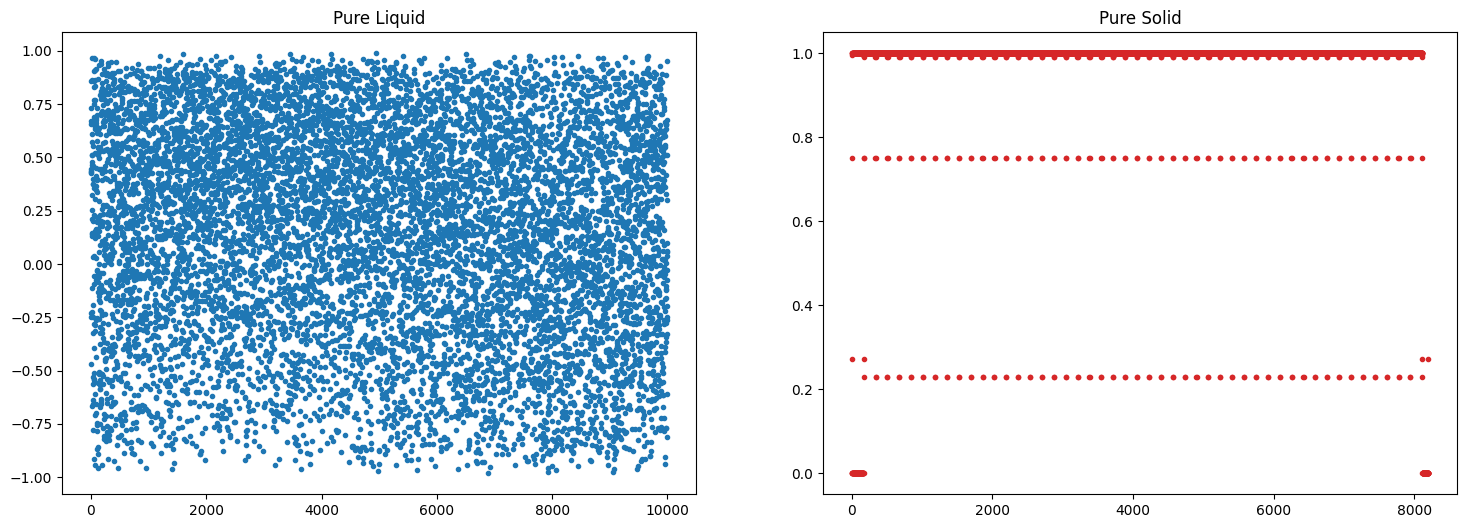

In [7]:
q6r_l, lq6i_l = np.genfromtxt('density--10000--116.72x116.72/pure_liquid/dump-q.lammpstrj',skip_header=9, unpack=True, usecols=(5,6))
q6r_c, q6i_c = np.genfromtxt('pure_crystal/dump-q.lammpstrj',skip_header=9, unpack=True, usecols=(5,6))

fig, ax = plt.subplots(1,2, figsize=(18,6), dpi=100, sharex=False, sharey=False)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:brown' ]

ax[0].plot(q6r_l,'.', color='tab:blue')
ax[0].set_title('Pure Liquid')
ax[1].plot(q6r_c, '.', color='tab:red')
ax[1].set_title('Pure Solid')

# ◆ Seed of55 atoms (different lattice spacings)

## ▻ Radial Distribution Function

In [9]:
scales=['0.4']
times=['25','50','75','100']
mydatardf = []

for i in scales:
    for time in times:
        my_rdf_file= pd.read_csv(f'density--10000--116.72x116.72/hex-{i}/55-atoms/density-0.807/rdf_at_t{time}-55-atoms.txt', sep=" ", skiprows=2, header=None)
        mydatardf.append(my_rdf_file)
xrdf=[]
yrdf=[]

for i in range(len(mydatardf)):
    xxrdf=mydatardf[i][0]
    yyrdf=mydatardf[i][1]
    xrdf.append(xxrdf)
    yrdf.append(yyrdf)

In [10]:
len(mydatardf)

4

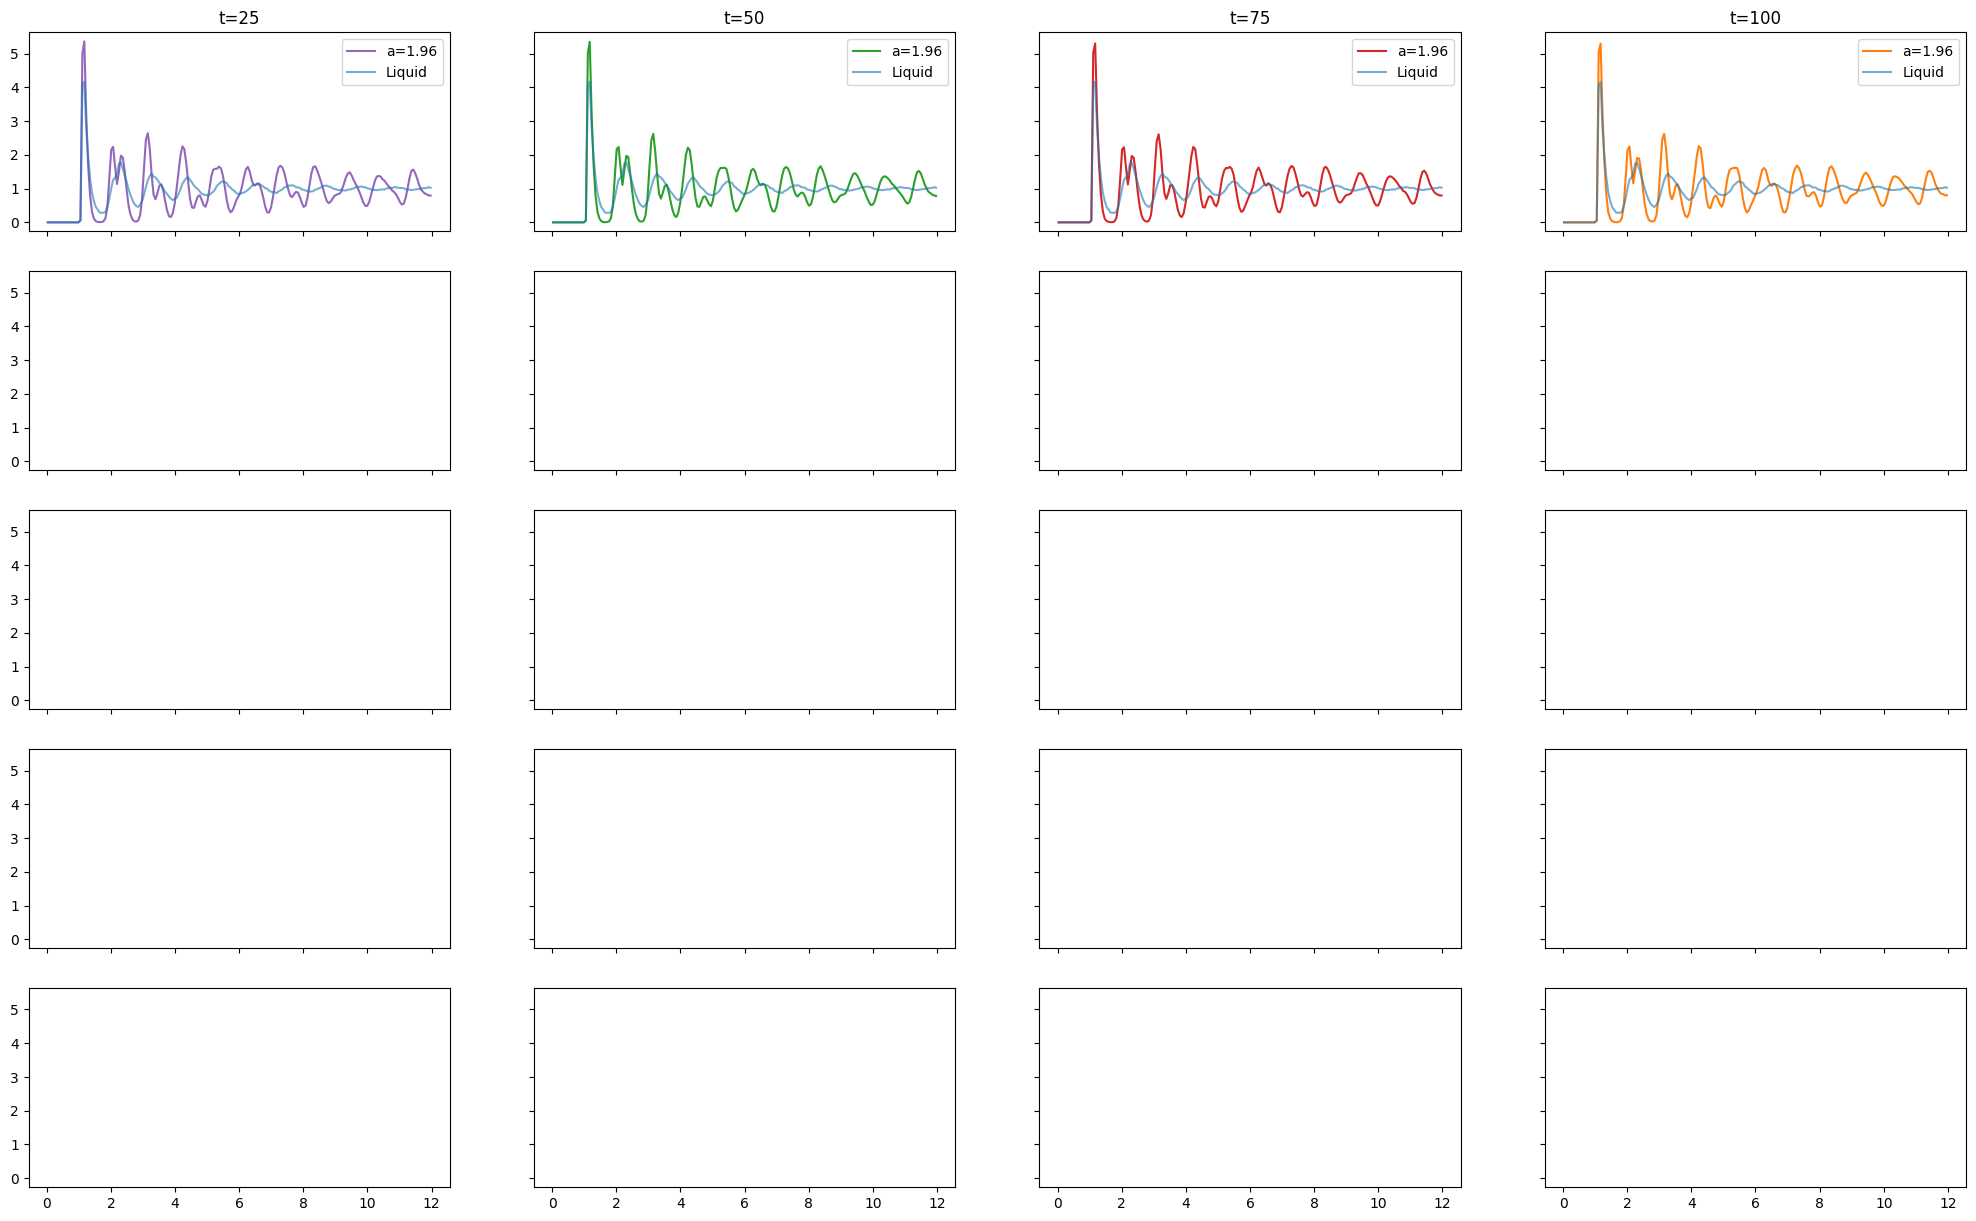

In [11]:
scales=['0.3','0.4','0.5','0.6','0.7']
lats=['1.96','1.70','1.52','1.38','1.29']
# lats=['1.96','1.70','1.52','1.38','1.29','1.20','1.13']
times=['25','50','75','100']

fig, ax = plt.subplots(5, 4, figsize=(25,15), dpi=100, sharex=True, sharey=True)
colors = ['tab:purple','tab:green', 'tab:red','tab:orange' ]

v=4
for i in range(len(mydatardf)):
    if i<=3:
        n=0
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].set_title(f't={times[i]}')
        ax[n,ii].legend(loc='upper right')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')      
        ax[n,ii].legend(loc='upper right')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        ax[n,ii].plot(xrdf[i], yrdf[i], color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].plot(xl,yl, alpha=0.6, color='tab:blue', label='Liquid')
        ax[n,ii].legend(loc='upper right')
        
# plt.suptitle('ddd', y=0.95, size=10)

##plt.savefig('/.png', dpi=100,bbox_inches='tight')

##  ▻ Bond Orientational Order

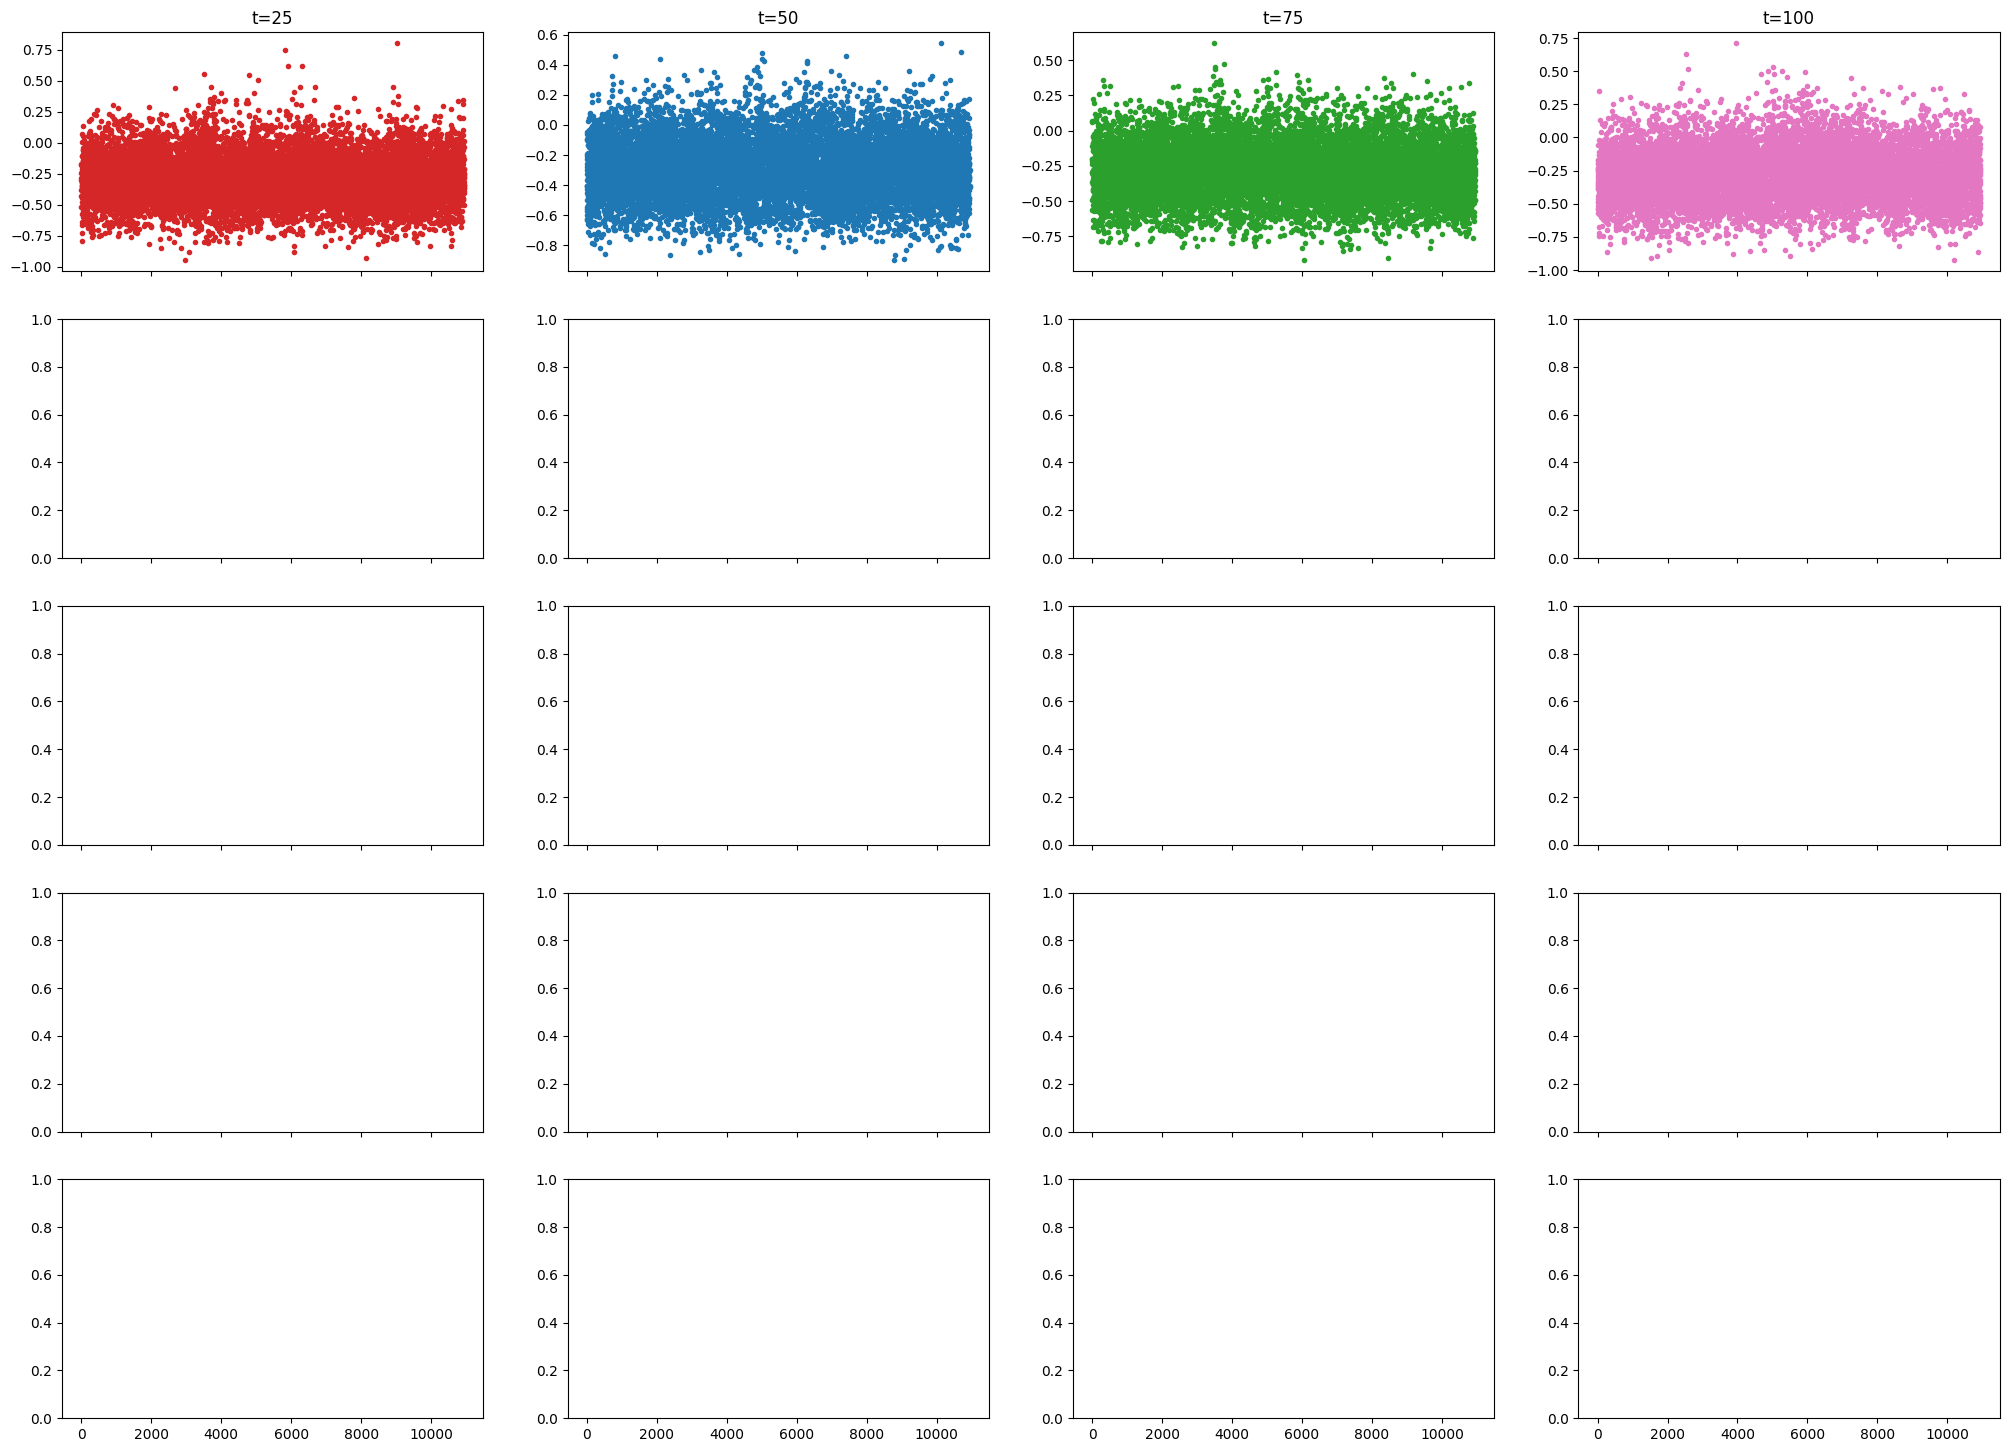

In [12]:
scales=['0.4']
times=['25','50','75','100']
mydataq = []

for i in scales:
    for time in times:
        myfileq= np.genfromtxt(f'density--10000--116.72x116.72/hex-{i}/55-atoms/density-0.807/dump-q-at_t{time}-55.lammpstrj', skip_header=9, unpack=True, usecols=(5,6))
        mydataq.append(myfileq) 
    
xq=[]
yq=[]

for i in range(len(mydataq)):
    xxq=mydataq[i][0]
    yyq=mydataq[i][1]
    xq.append(xxq)
    yq.append(yyq)

fig, ax = plt.subplots(5, 4, figsize=(25,18), dpi=100, sharex=True, sharey=False)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:brown' ]

v=4
for i in range(len(xq)):
    if i<=3:
        n=0
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].plot(xq[i],'.', color=colors[ii])
        ax[n,ii].set_title(f't={times[ii]}')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        ax[n,ii].plot(xq[i],'.', color=colors[ii])
    elif 7<i<=11:
        n=2
        ii=i-n*v
        x = xq[i]
        ax[n,ii].plot(xq[i],'.', color=colors[ii])
    elif 11<i<=15:
        n=3
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].plot(xq[i],'.', color=colors[ii])
    elif 15<i<=19:
        n=4
        ii=i-n*v
        x = xq[i]
        ax[n,ii].plot(xq[i],'.', color=colors[ii])

# v=2
# for i in range(len(mydataq)):
#     if i<=1:
#         ax[0,i].plot(xq[i],'.', color=colors[i])
#         ax[0,i].set_title(f't={times[i]}')
#     else:
#         ii=i-v
#         ax[1,ii].plot(xq[i],'.', color=colors[i])
#         ax[1,ii].set_title(f't={times[i]}')
        
##plt.suptitle('ρ=1100/400: Hexatic order parameter of crystal seed of 55 atoms', y=0.98, size=12)

# ◆ Bond Order Analysis

## ▻  Histograms pure systems

Text(0.5, 1.0, 'Abs q6 histogram of pure liquid system')

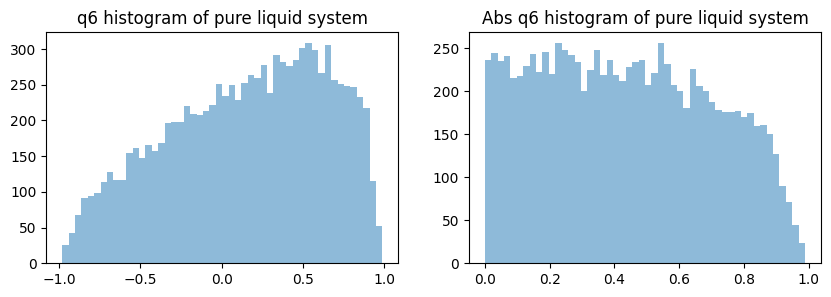

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,3), dpi=100, sharex=False, sharey=False)

ax[0].hist(q6r_l, alpha=0.5, bins=50, density=False, stacked=True, color='tab:blue')
ax[0].set_title('q6 histogram of pure liquid system')
# ax[1].hist(q6r_c, alpha=0.5, bins=50, density=False, stacked=True, color='tab:red')
# ax[1].set_title('q6 histogram of pure crystal system')


absl=abs(q6r_l)
ax[1].hist(absl, alpha=0.5, bins=50, density=False, stacked=True, color='tab:blue')
ax[1].set_title('Abs q6 histogram of pure liquid system')


# plt.suptitle('ρ=1100/400 \n Hexatic order parameter of pure systems', y=1.05, size=16)

## plt.savefig('plot-results/bo-analysis/1100_histogram-pure_systems.png')

## ▻ Histograms 109 atoms

In [14]:
len(xq)

4

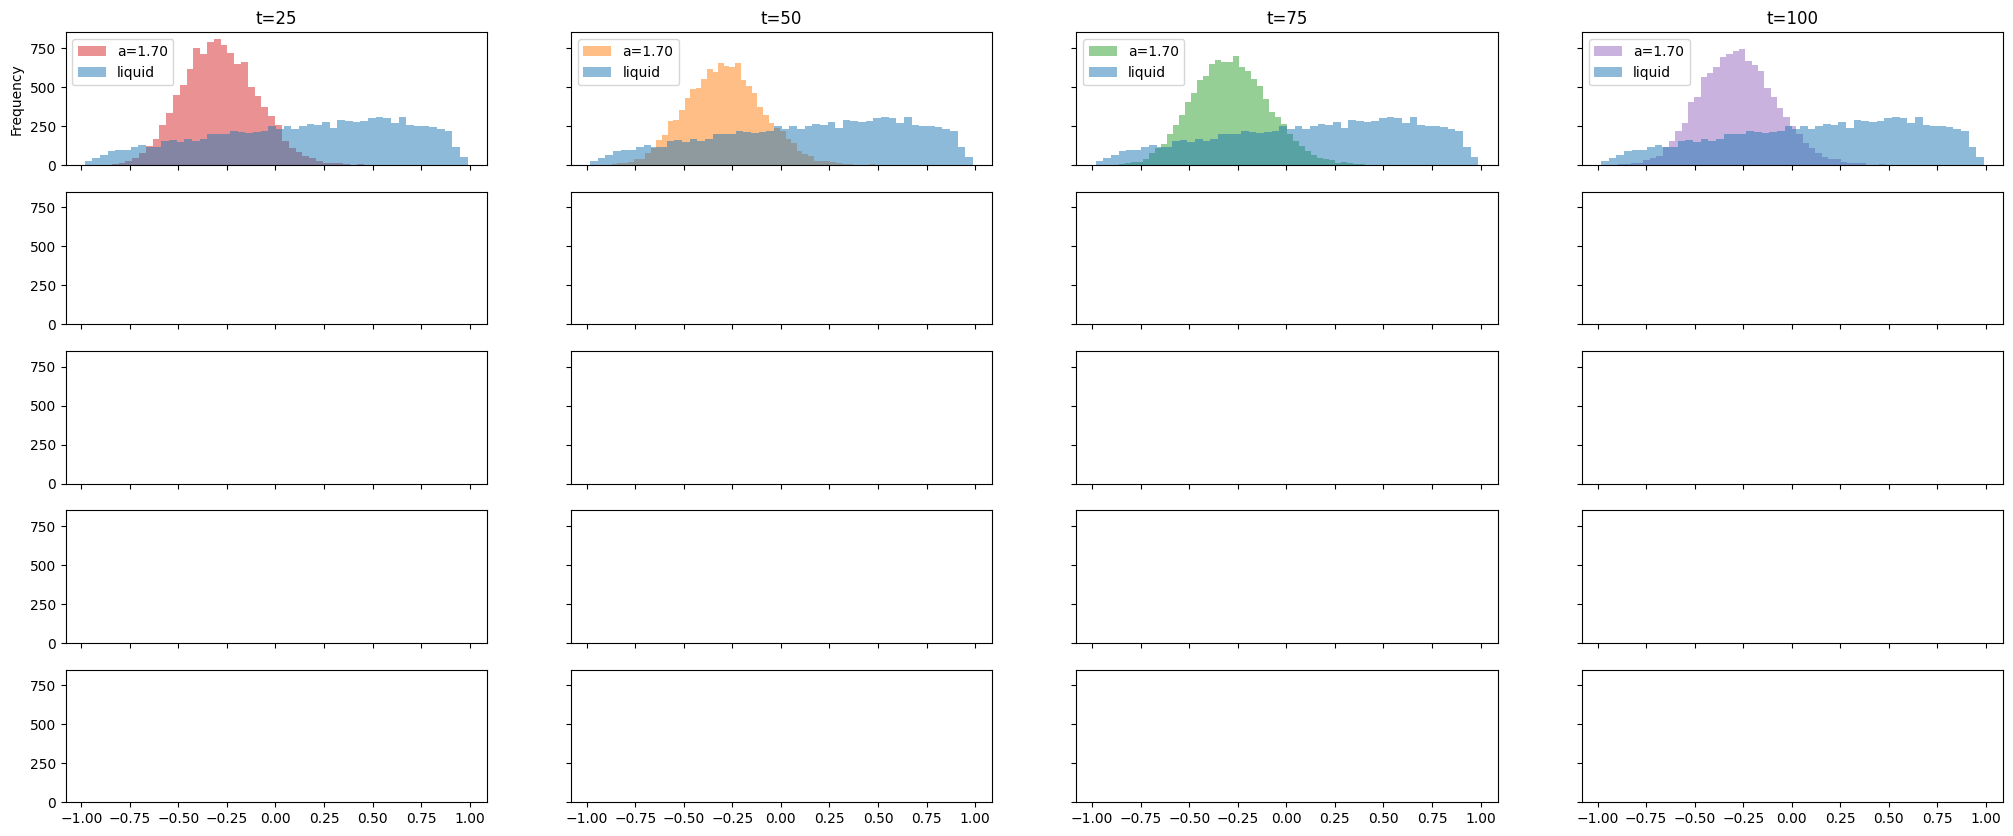

In [15]:
scales=['0.4']
lats=['1.70','1.52','1.38','1.29','1.20','1.13'] 
times=['25','50','75','100']

fig, ax = plt.subplots(5, 4, figsize=(25,10), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]

v=4
for i in range(len(xq)):
    if i<=3:
        n=0
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper left')
        ax[n,0].set_ylabel('Frequency')
        # ax[n,].set_xlabel('q6')
        ax[n,ii].set_title(f't={times[i]}')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        x = xq[i] 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        x = xq[i]
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(q6r_l, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper right')
        ax[n,0].set_ylabel('Frequency')

# plt.suptitle('', y=0.98, size=10)

# plt.savefig('.png', bbox_inches='tight')

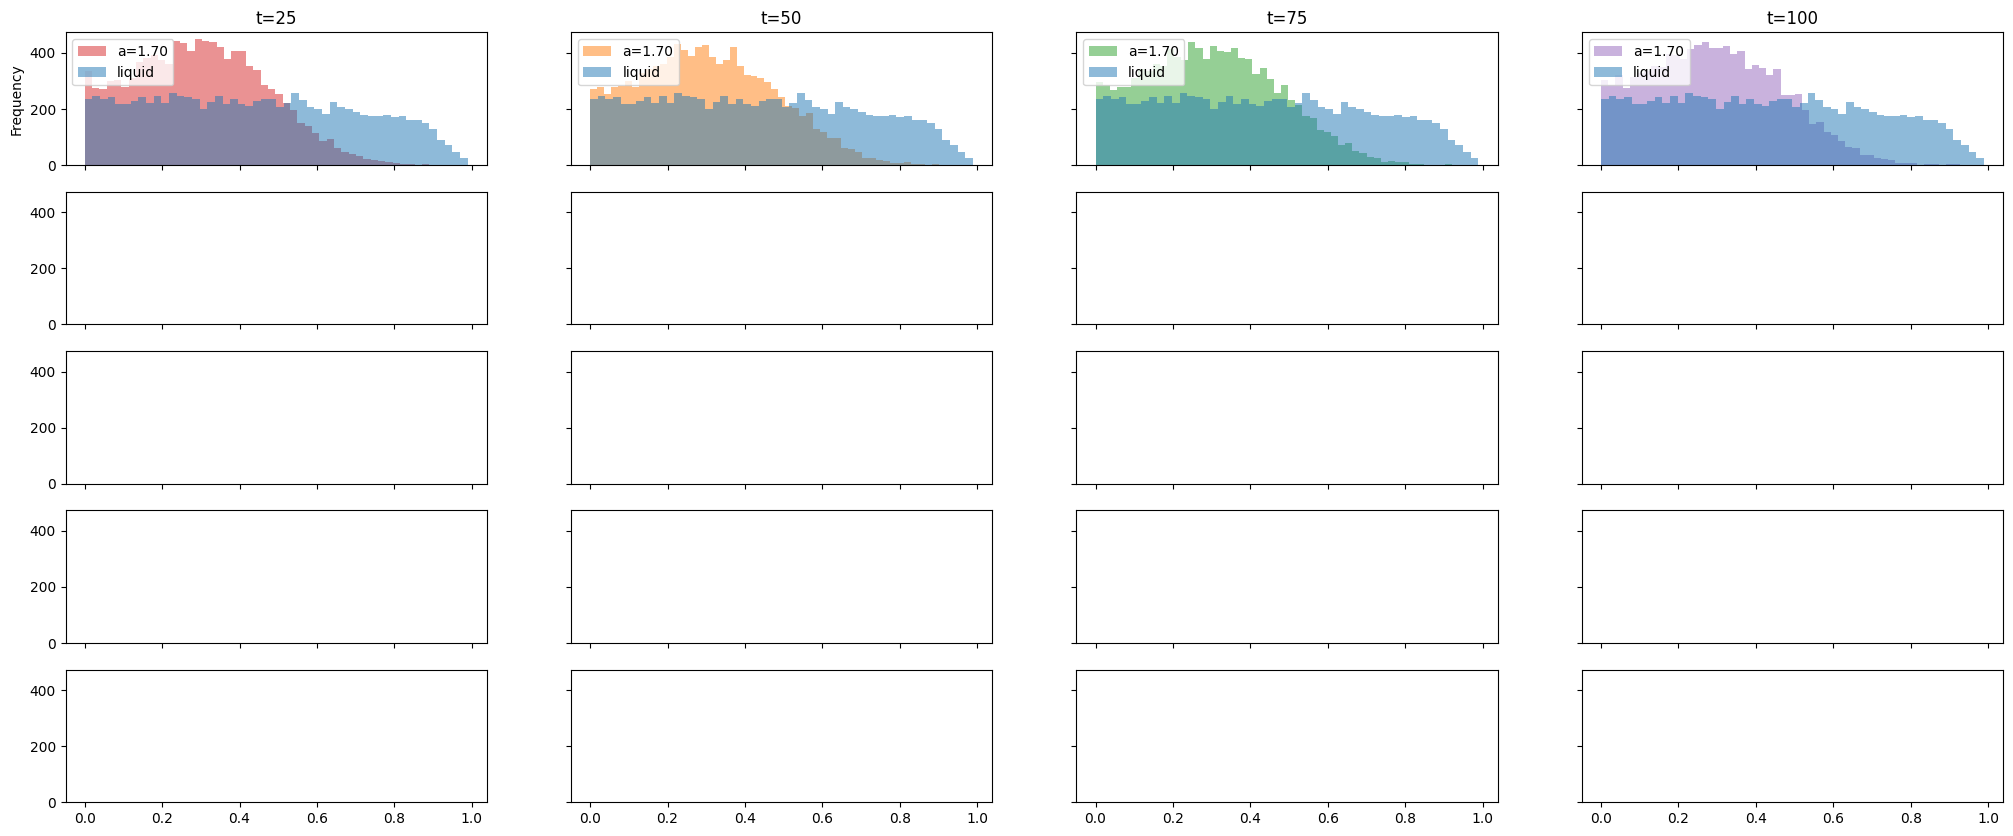

In [16]:
scales=['0.4']
lats=['1.70','1.52','1.38','1.29','1.20','1.13'] 
times=['25','50','75','100']

fig, ax = plt.subplots(5, 4, figsize=(25,10), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:olive', 'tab:brown' ]


v=4
for i in range(len(xq)):
    if i<=3:
        n=0
        ii=i-n*v
        x = abs(xq[i]) 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(absl, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper left')
        ax[n,0].set_ylabel('Frequency')
        # ax[n,].set_xlabel('q6')
        ax[n,ii].set_title(f't={times[i]}')
    elif 3<i<=7:
        n=1
        ii=i-n*v
        x = abs(xq[i]) 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(absl, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper left')
        ax[n,0].set_ylabel('Frequency')
    elif 7<i<=11:
        n=2
        ii=i-n*v
        x = abs(xq[i]) 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(absl, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper left')
        ax[n,0].set_ylabel('Frequency')
    elif 11<i<=15:
        n=3
        ii=i-n*v
        x = abs(xq[i]) 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(absl, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper left')
        ax[n,0].set_ylabel('Frequency')
    elif 15<i<=19:
        n=4
        ii=i-n*v
        x = abs(xq[i]) 
        ax[n,ii].hist(x, alpha=0.5, bins=50, density=False, stacked=True, color=colors[ii],label=f'a={lats[n]}')
        ax[n,ii].hist(absl, alpha=0.5, bins=50,stacked='True', label='liquid',color='tab:blue')
        ax[n,ii].legend(loc='upper left')
        ax[n,0].set_ylabel('Frequency')
    

# plt.suptitle('', y=0.98, size=10)

# plt.savefig('.png', bbox_inches='tight')